## Using Regular expressions and Python for data analysis

The objective of this exercise is to read in a text document and make some analysis on the data found.

In [1]:
import re, sys
import matplotlib.pyplot as plt
from collections import Counter

#### Exercises on Frankenstein_Chpt_1

There are 3 hidden sentences within the 'Frankenstein_chpt_1.txt' that are bookeneded by special characters. Lets find them, put them into a list of lists and remove them from the original document and rewrite a cleaner txt called 'Clean_Frankenstein.txt'.  With the 'Cleaned_Frankenstein.txt' file, create a dictionary of all unique words and the frequency of each unique words use.

* Create a list of lists with the hidden sentences
* Remove the hidden sentences from the file and rewrite a new file called 'Cleaned_Frankenstein.txt'
* Create a dictionary with all unique words (ignore case sensitivity) as the dictionary key and the frequency of each words use as a key value.
* Plot a histogram of each unique word length and the frequency of that length within the text

In [14]:
with open('Frankenstein_chpt_1.txt') as f:
    lines = f.read()
    
lines

"“Letter 1\nTo Mrs. Saville, England. <Scrapers<\nSt. Petersburgh, Dec. 11th, 17—.\nYou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my $You$ dear sister of my welfare and increasing confidence in the success of my undertaking.\nI am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents $are$ itself to my imagination as the region of beauty and delight. There, Margaret, the sun is for ever vi

In [17]:
s = lines

# The hidden words are bookened by $, #, *, < characters
hidden = ["([$]\w*\S\w*\S)","([#]\w*\S\w*\S)","([*]\w*\S\w*\S)","([<]\w*\S\w*\S)"]

sentences = []
for r in hidden:
    matches = re.finditer(r, s)
    temp_sent = []
    for m in matches:
        temp_sent.append(m.group())
    
    sentences.append(temp_sent)

##### Hidden sentences in a list of lists

In [18]:
sentences

[['$You$', '$are$', '$amazing!$'],
 ['#Found#', '#another#', '#one!#'],
 ["*You're*", '*killin*', '*it!*'],
 ['<Scrapers<', '<for<', '<the<', '<win!<']]

##### Now lets remove the hidden sentences from the original txt file and rewrite a new txt file

In [19]:
with open('Frankenstein_chpt_1.txt') as f:
    lines = f.read()

for i in range(0, len(sentences)):
    for word in sentences[i]:
        lines = lines.replace(word, "")
        
with open('Clean_Frankenstein.txt', 'w') as f:
    f.write(lines)

##### Now lets create a dictionary off all the unique words as the keys and the frequency of each word as the key value

In [20]:
with open('Clean_Frankenstein.txt') as f:
    lines = f.read()
    
r = "(?i)\w+\S\w+|\w*"
s = lines

matches = re.finditer(r,s)
word_list = []
for m in matches:
    word_list.append(m.group().casefold())

word_count_dict = Counter(word_list)
len(word_count_dict)

569

In [21]:
word_count_dict

Counter({'': 1393,
         'letter': 2,
         '1': 1,
         'to': 35,
         'mrs': 1,
         'saville': 1,
         'england': 1,
         'st': 2,
         'petersburgh': 3,
         'dec': 1,
         '11th': 1,
         '17': 1,
         'you': 10,
         'will': 5,
         'rejoice': 1,
         'hear': 1,
         'that': 12,
         'no': 3,
         'disaster': 1,
         'has': 3,
         'accompanied': 2,
         'the': 67,
         'commencement': 1,
         'of': 36,
         'an': 6,
         'enterprise': 2,
         'which': 19,
         'have': 8,
         'regarded': 1,
         'with': 12,
         'such': 2,
         'evil': 1,
         'forebodings': 1,
         'i': 46,
         'arrived': 1,
         'here': 1,
         'yesterday': 1,
         'and': 44,
         'my': 42,
         'first': 2,
         'task': 1,
         'is': 9,
         'assure': 1,
         'dear': 4,
         'sister': 3,
         'welfare': 1,
         'increasing': 1,
  

##### Now lets plot a histogram of each unique words length and the frequency of that word length

In [22]:
# a list of every unique word length within the document
word_lengths = []

# sorted word lengths
sorted_word_lengths = []

# the occurrence of every length for all words within the document
counts = []

for i in set(word_list):
    word_lengths.append(len(i))

sorted_word_lengths = sorted(word_lengths)

for j in range(max(word_lengths)+1):
    counts.append(word_lengths.count(j))

count_dict = dict(zip(range(max(word_lengths)+1), counts))
count_dict

{0: 1,
 1: 4,
 2: 26,
 3: 39,
 4: 92,
 5: 78,
 6: 77,
 7: 78,
 8: 52,
 9: 59,
 10: 27,
 11: 23,
 12: 8,
 13: 2,
 14: 2,
 15: 0,
 16: 1}

##### Lets make sure we're not missing anything

In [23]:
# According to our dictionary, we have 8 different words with 12 characters. Lets see what they are

def verify_work():
    tmp = []
    char = int(input("Please enter a character length to verify: "))

    for word, freq in word_count_dict.items():
        if len(word) == char:
            tmp.append(word)

    print("There are",len(tmp),"words with",char,"characters")
    return(tmp)


In [24]:
verify_work()

Please enter a character length to verify: 12
There are 8 words with 12 characters


['commencement',
 'undiscovered',
 'observations',
 'ascertaining',
 'tranquillise',
 'intellectual',
 'passionately',
 'affectionate']

##### Plot

Text(0.5,1,'Count of words by word length')

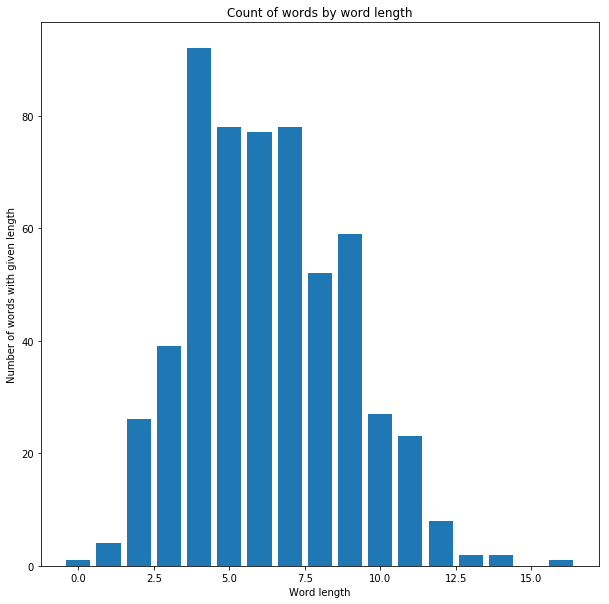

In [25]:
plt.figure(figsize=(10,10))
plt.bar(count_dict.keys(),
        count_dict.values())

plt

plt.xlabel('Word length')
plt.xticks(rotation = 0)
plt.ylabel('Number of words with given length')
plt.title('Count of words by word length')